# Construcción de un modelo estadístico base

### Librerías Utilizadas

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pylab as py


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqline

### Importamos los datos

Las variables que se eligieron en la entrega anterior fueron: 

- cylindernumber
- curbweight
- enginesize
- horsepower
- citympg
- highwaympg

El dataframe a continuación contará con dichas variables junto con 'Price'.

In [192]:
df = pd.read_csv('precios_autos-2.csv')
df = df.drop(['symboling','CarName','fueltype','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','enginetype','stroke','compressionratio','peakrpm'], axis=1)
df.head()

,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,2548,four,130,111,21,27,13495.0
1,2548,four,130,111,21,27,16500.0
2,2823,six,152,154,19,26,16500.0
3,2337,four,109,102,24,30,13950.0
4,2824,five,136,115,18,22,17450.0


In [193]:
# asignamos valor numerico a variable categorica cylindernumber

numeros = ['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve']

for i in range(len(df['cylindernumber'])):
    for j in range(len(numeros)):
        if df['cylindernumber'][i] == numeros[j]:
            df['cylindernumber'][i] = int(j)

df.to_csv('precios_autos_limpio.csv')

/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel_3009/3951554553.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel_3009/3951554553.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel_3009/3951554553.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel

Ahora se normalizarán los datos con la intención de hacer una regresión. Esto debido a que en la entrega anterior claramente se veía en la matriz de dispersión que había mucho ruido en los datos, por lo que se optó por normalizarlos para reducir dicho ruido.

In [194]:
d_cuantitativo = df.drop(columns=['cylindernumber'])
d = preprocessing.normalize(d_cuantitativo)
datos = pd.DataFrame(d, columns=['curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg', 'price'])
datos = datos.join(df['cylindernumber'])
datos.head()

,curbweight,enginesize,horsepower,citympg,highwaympg,price,cylindernumber
0,0.185518,0.009465,0.008082,0.001529,0.001966,0.982559,4
1,0.152607,0.007786,0.006648,0.001258,0.001617,0.988232,4
2,0.168626,0.009079,0.009199,0.001135,0.001553,0.985593,6
3,0.165215,0.007706,0.007211,0.001697,0.002121,0.986197,4
4,0.159747,0.007693,0.006505,0.001018,0.001244,0.987105,5


### Matriz de dispersión

En el documento entregado anteriormente se mostraron cada uno de los datos que son atípicos del dataframe. Ahora, se volverán a mostrar pero utilizando una matriz de dispersión.

In [195]:
fig = px.scatter_matrix(datos, width=1300, height=1500)
fig.update_layout({"xaxis"+str(i+1): dict(tickangle = -90) for i in range(13)})
fig.update_traces(diagonal_visible=False)
fig.show()

Observamos que la mayoría de los datos siguen una regresión lineal entre ellos, con excepción de cylindernumber ya que es una variable categórica. Igualmente, observamos que para el grán número de datos (205 datos), la mayoría no cuenta con una cantidad significante de valores atípicos, por lo que no se eliminarán para la primera modelación y, en caso de ser necesario, se eliminarán y se volverá a modelar los datos sin estos valores atípicos.

### Regresión Lineal Múltiple

La razón por la que se eligió la regresión lineal es porque en la Matriz de Dispersión anterior se puede observar como los datos en su mayoría siguen una tendencia lineal, por lo que se quiere verificar si este es el caso. Para esto, se hará la implementación del modelo y después se hará una verificación del modelo.

In [196]:
# descripción de los datos

datos.describe()

,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.221267,0.010652,0.008528,0.002569,0.003096,0.973007
std,0.062491,0.002872,0.002108,0.001606,0.001831,0.013875
min,0.075401,0.005042,0.003865,0.000307,0.000351,0.928051
25%,0.175064,0.008148,0.006982,0.001227,0.001553,0.963059
50%,0.228737,0.010744,0.008824,0.002383,0.002930,0.973356
75%,0.268664,0.012970,0.009985,0.003755,0.004358,0.984500
max,0.371728,0.017589,0.013145,0.008764,0.009883,0.997124


In [197]:
X = datos.drop(columns=['price'])
y = datos['price']


# crear las variables de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [198]:
# crear el modelo

model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [199]:
# predecir los valores de price

predictions = model.predict(X_test)

In [200]:
# imprimimos los valores de los coeficientes

print('Beta_0 = ', model.intercept_)
print('Beta_1 = ', model.coef_[0])
print('Beta_2 = ', model.coef_[1])
print('Beta_3 = ', model.coef_[2])
print('Beta_4 = ', model.coef_[3])
print('Beta_5 = ', model.coef_[4])
print('Beta_6 = ', model.coef_[5])

Beta_0 =  1.0265139468248388
Beta_1 =  -0.2247057820169931
Beta_2 =  0.37948163177780686
Beta_3 =  0.02306305069845025
Beta_4 =  0.1961334013111839
Beta_5 =  -0.915855356720676
Beta_6 =  -0.0012597199111909869


Con los resultados arrojados anteriormente, observamos que la regresión está descrita por la ecuación $y = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_6  x_6$ donde los valores de $\beta$ son:

- $\beta_0$ = 1.02651
- $\beta_1$ = -0.22470
- $\beta_2$ = 0.37948
- $\beta_3$ = 0.02306
- $\beta_4$ = 0.19613
- $\beta_5$ = -0.91585
- $\beta_6$ = -0.00125

y los valores de $x_k$ representan los valores de:

- $x_1$ = cylindernumber
- $x_2$ = curbweight
- $x_3$ = enginesize
- $x_4$ = horsepower
- $x_5$ = citympg
- $x_6$ = highwaympg

In [201]:
# imprimir los valores de los errores

print('Error Medio Cuadrado: ', mean_squared_error(y_test, predictions))
print('Error Medio Absoluto: ', mean_absolute_error(y_test, predictions))
print('Coeficiente de Pearson: ', r2_score(list(y_test), list(predictions)))

Error Medio Cuadrado:  6.052843179815907e-06
Error Medio Absoluto:  0.0017214024102526857
Coeficiente de Pearson:  0.9736484194641407


Como observamos, obtenemos valores de error muy pequeños al igual que un valor del Coeficientge de Pearson muy alto, siendo este 97.36%. Ahora hay que seguir validando el modelo para verificar que sea igual de preciso como se dice en los datos anteriores.

In [202]:
resultados = pd.DataFrame()
resultados['predicted'] = list(predictions)
resultados['actual'] = list(y_test)
resultados['residual'] = resultados['predicted'] - resultados['actual']
resultados = resultados.sort_values(by='residual').reset_index(drop=True)
resultados.describe()

,predicted,actual,residual
count,62.000000,62.000000,62.000000
mean,0.970386,0.969805,0.000581
std,0.014551,0.015279,0.002410
min,0.944615,0.937289,-0.002958
25%,0.959647,0.959895,-0.001110
50%,0.967100,0.967638,-0.000201
75%,0.982180,0.983193,0.001468
max,1.002238,0.996648,0.007614


<Axes: xlabel='residual', ylabel='Count'>

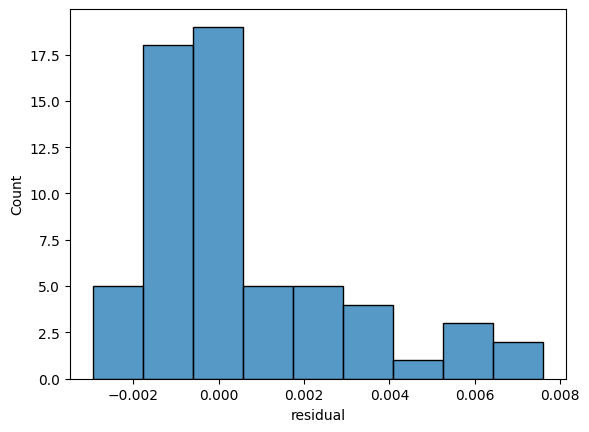

In [203]:
#histograma de residuos

sns.histplot(data=resultados['residual'])

<Axes: xlabel='residual', ylabel='Density'>

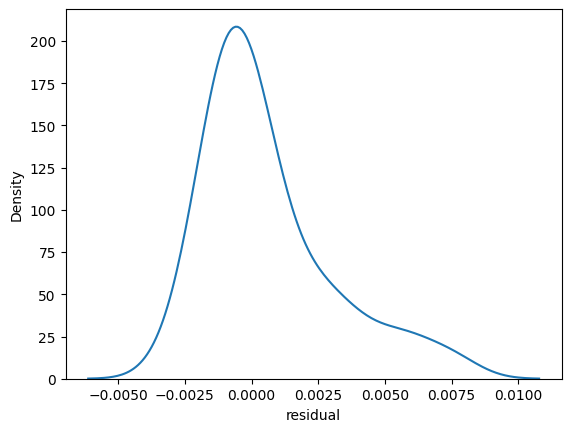

In [204]:
# Densidad de residuos

sns.kdeplot(data=resultados['residual'])

Observando

In [205]:
anderson(resultados['residual'])


AndersonResult(statistic=2.7556482153136983, critical_values=array([0.544, 0.62 , 0.744, 0.868, 1.032]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0005814115029586383, scale=0.002410080735776713)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

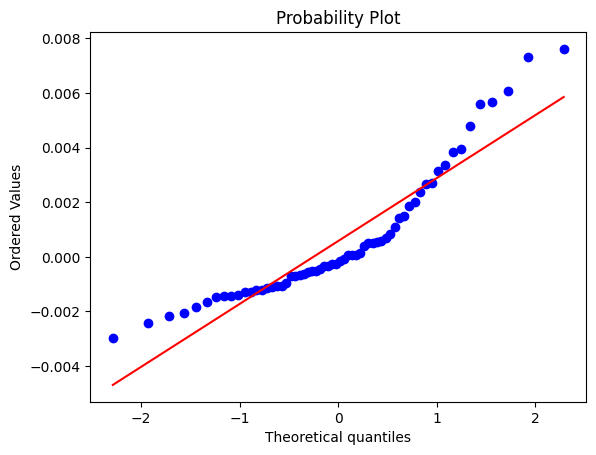

In [211]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(resultados['residual'], dist="norm", plot=pylab)
pylab.show()